Funzioni utili
=======

In [1]:
from larlib import *

Evaluating fenvs.py..
...fenvs.py imported in 0.007305 seconds


In [52]:
def ArchSurface(args):
    """
    Return a Bezier function created from 2 circumferences
    """
    rr, w, h = args
    x1 = lambda p: rr*cos(p[0])
    y1 = lambda p: rr*sin(p[0])
    x2 = lambda p: (rr-w)*cos(p[0])
    y2 = lambda p: (rr-w)*sin(p[0])
    z = lambda p: h
    bz11 = BEZIER(S1)([CONS([x1,y1,z])])
    bz12 = BEZIER(S1)([CONS([x2,y2,z])])
    return BEZIER(S2)([bz11, bz12])

In [53]:
def Arch(args,angle):
    length, w, depth = args
    radius = (length/2) / cos(angle/2)
    # ceiling per traslazione, per ora non è necessario
    domain2D = PROD([T(1)(angle/2)(INTERVALS(PI-angle)(16)), QUOTE([1])])
    domain3D = PROD([domain2D, QUOTE([1])])
    ArchSurf2D_0 = ArchSurface([radius,w,0])
    ArchSurf2D_1 = ArchSurface([radius,w,depth])
    SolidMap = BEZIER(S3)([ArchSurf2D_0, ArchSurf2D_1])
    return MAP(SolidMap)(domain3D)

In [46]:
VIEW(Arch([10,1,1], 0.3*PI))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7feb02ac2210> >

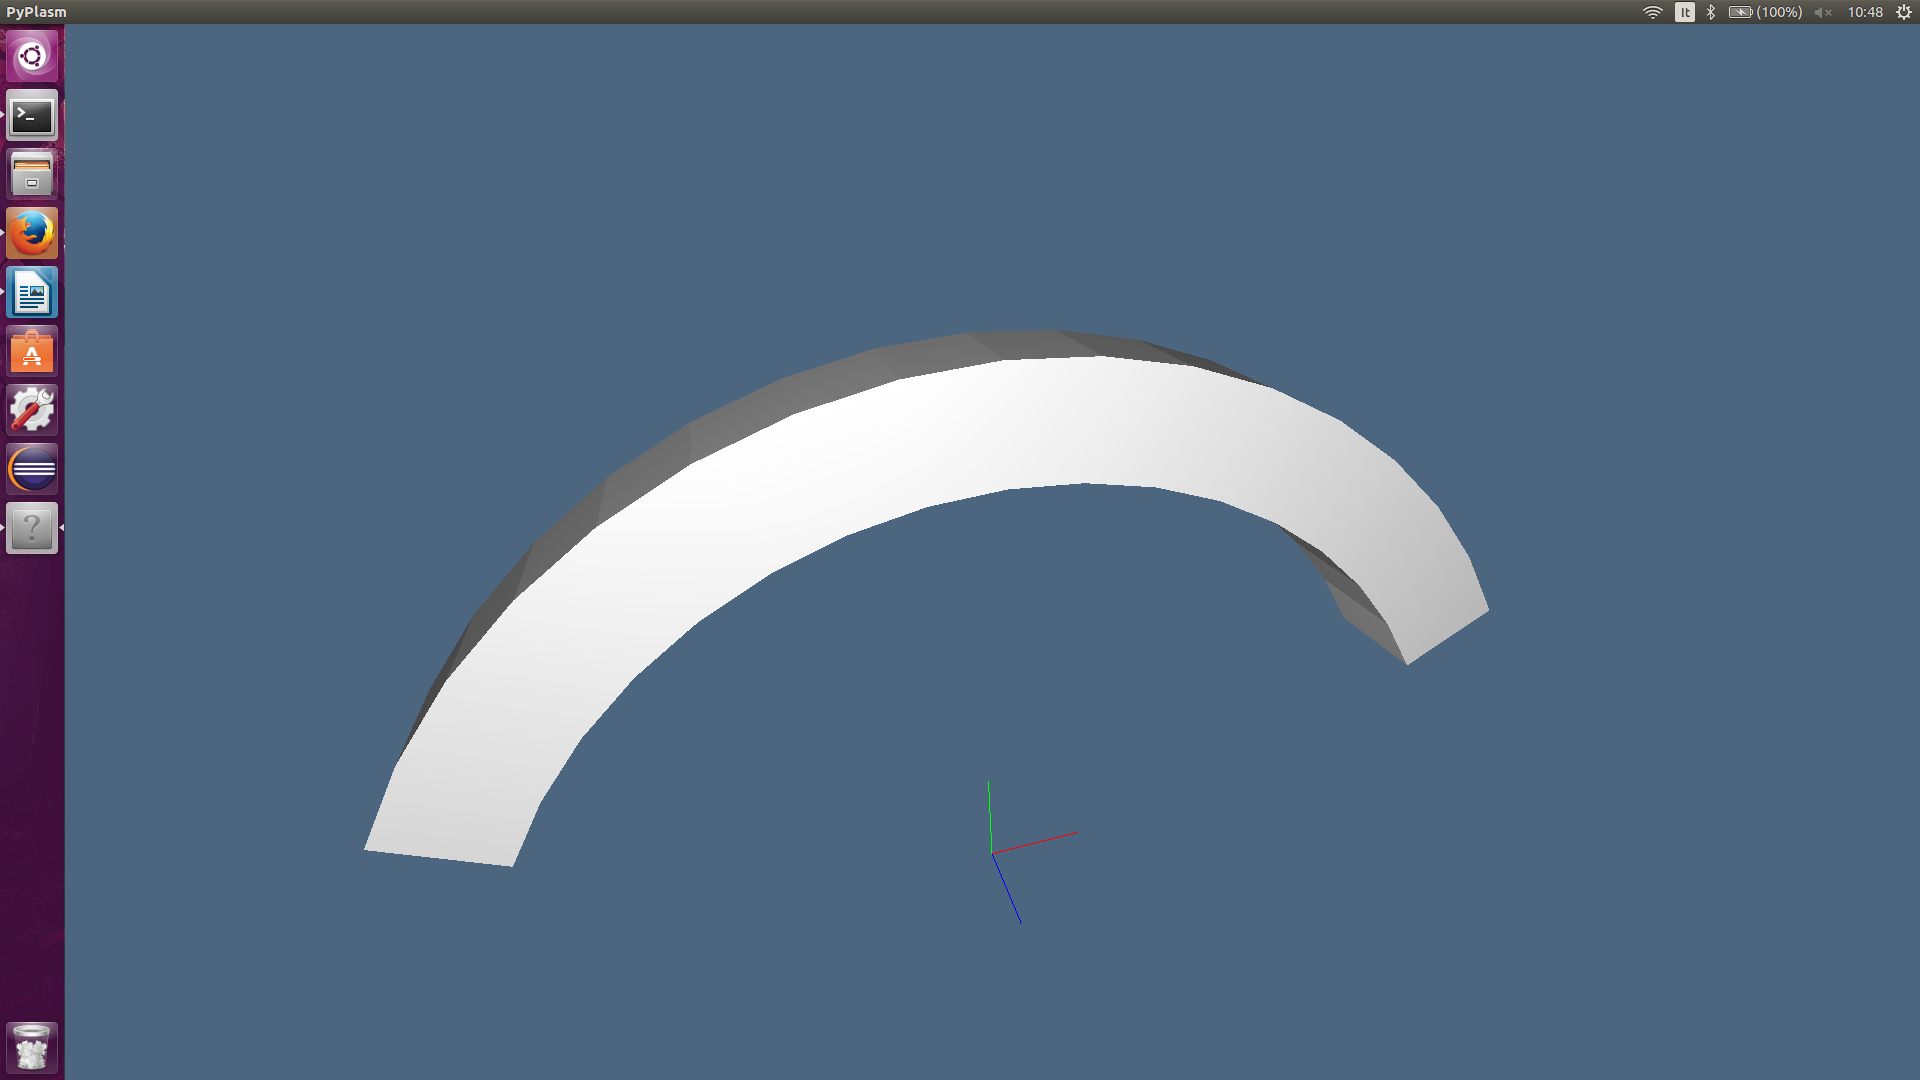

In [54]:
VIEW(SKEL_1(Arch([10,1,1], 0.3*PI)))

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7feb02ac6ab0> >

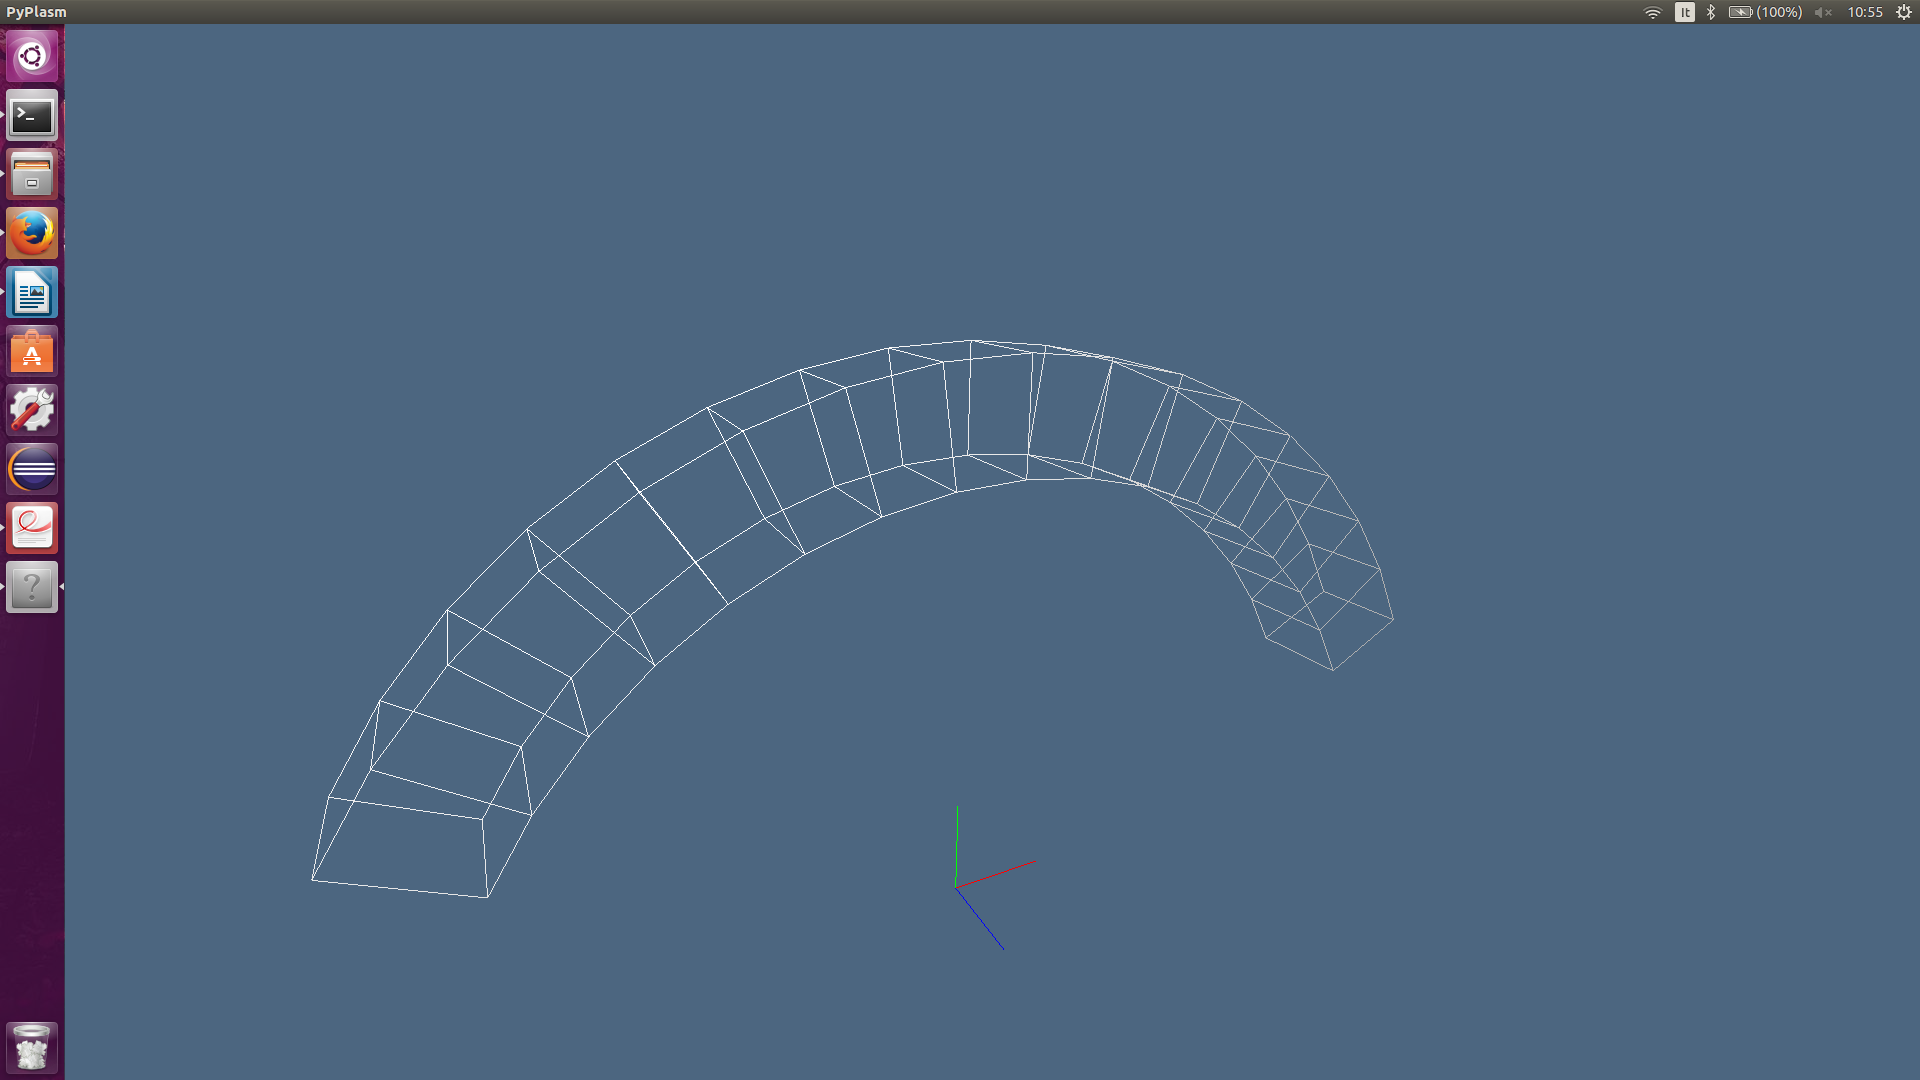